<a href="https://colab.research.google.com/github/alex-smith-uwec/NLP_Spring2025/blob/main/WikiScrape_tfidf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


In [2]:
# Function to scrape Wikipedia page content
def scrape_wikipedia(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    paragraphs = soup.find_all('p')
    text = ' '.join([para.get_text() for para in paragraphs])
    return text


In [3]:

# Wikipedia URLs
urls = [
    'https://en.wikipedia.org/wiki/Natural_language_processing',
    'https://en.wikipedia.org/wiki/Machine_learning',
    'https://en.wikipedia.org/wiki/Artificial_intelligence',
    'https://en.wikipedia.org/wiki/Data_science'
]



In [4]:

# Scrape texts
documents = [scrape_wikipedia(url) for url in urls]


In [7]:
print(documents[0])

Natural language processing (NLP) is a subfield of computer science and especially artificial intelligence. It is primarily concerned with providing computers with the ability to process data encoded in natural language and is thus closely related to information retrieval, knowledge representation and computational linguistics, a subfield of linguistics. Typically data is collected in text corpora, using either rule-based, statistical or neural-based approaches in machine learning and deep learning.
 Major tasks in natural language processing are speech recognition, text classification, natural-language understanding, and natural-language generation.
 Natural language processing has its roots in the 1950s.[1] Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence. The pro

In [11]:

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')#, max_features=20)
tfidf_matrix = vectorizer.fit_transform(documents)


In [13]:

# Convert to DataFrame for better visualization
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the DataFrame
print(df_tfidf)


       000        10       100       101       102       103      104  \
0  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
1  0.00423  0.010273  0.000000  0.004230  0.004230  0.004230  0.00423   
2  0.00673  0.010898  0.012805  0.003365  0.003365  0.003365  0.00673   
3  0.00000  0.014353  0.000000  0.000000  0.000000  0.000000  0.00000   

        105       106       107  ...      york    yoshua   youtube        ys  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1  0.004230  0.004230  0.004230  ...  0.000000  0.000000  0.000000  0.000000   
2  0.003365  0.003365  0.003365  ...  0.000000  0.004268  0.012805  0.004268   
3  0.000000  0.000000  0.000000  ...  0.022487  0.000000  0.000000  0.000000   

   yudkowsky     yuval     zadeh     zeros      zip     čapek  
0   0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  
1   0.000000  0.000000  0.000000  0.005365  0.01073  0.000000  
2   0.004268  0.004268  0.004268  0.00000

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between all pairs of documents
similarity_matrix = cosine_similarity(tfidf_matrix)

# Print the similarity matrix
print(similarity_matrix)

[[1.         0.25162008 0.24745656 0.12617041]
 [0.25162008 1.         0.461205   0.33614682]
 [0.24745656 0.461205   1.         0.18316673]
 [0.12617041 0.33614682 0.18316673 1.        ]]


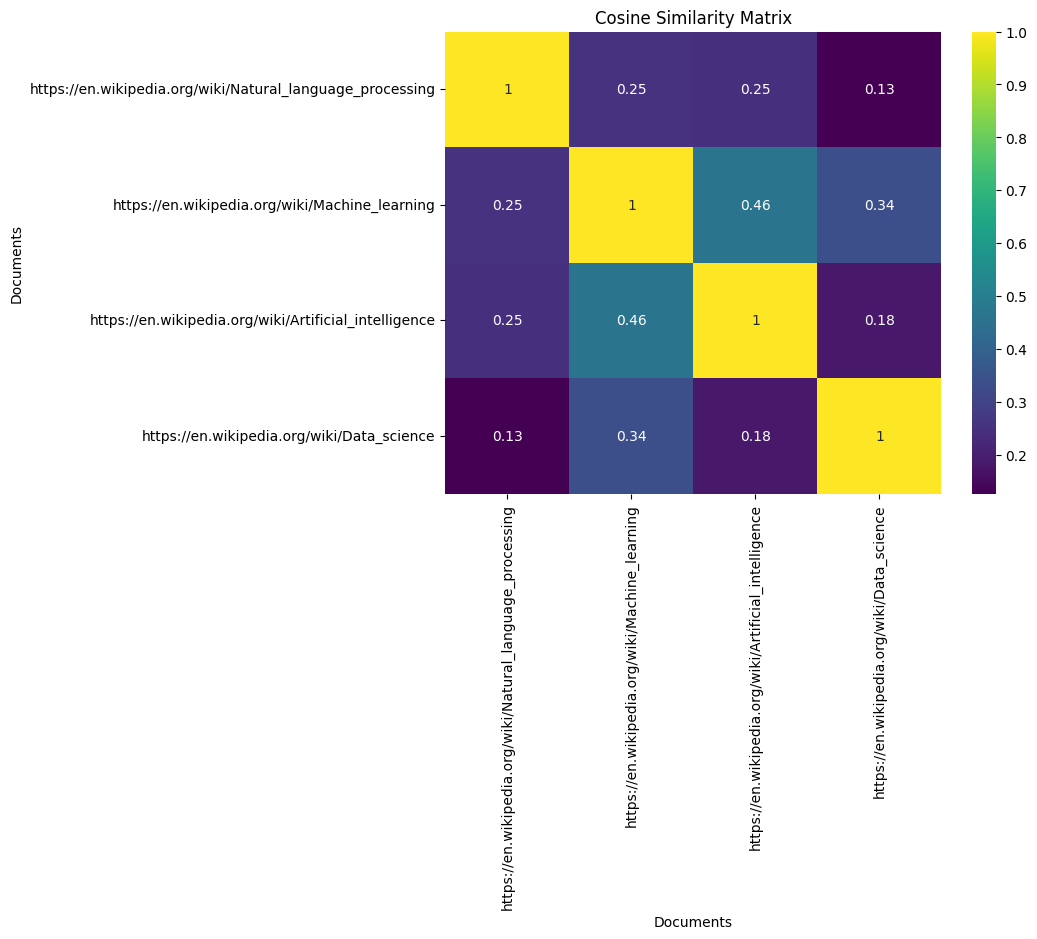

In [17]:
# prompt: create heat map of similarity_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap='viridis', xticklabels=urls, yticklabels=urls)
plt.title('Cosine Similarity Matrix')
plt.xlabel('Documents')
plt.ylabel('Documents')
plt.show()
